In [ ]:
!pip install -U transformers
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade
!pip install -U accelerate
!pip install -U datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.2.1
    Uninstalling acceler

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


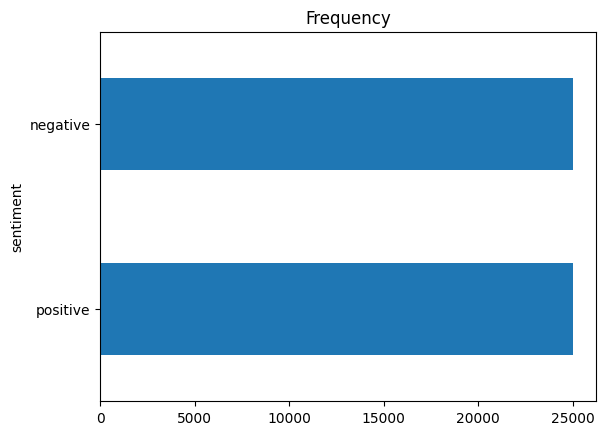

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
label_counts = df['sentiment'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency")
plt.show()

<Axes: title={'center': 'Words per Tweet'}, xlabel='sentiment'>

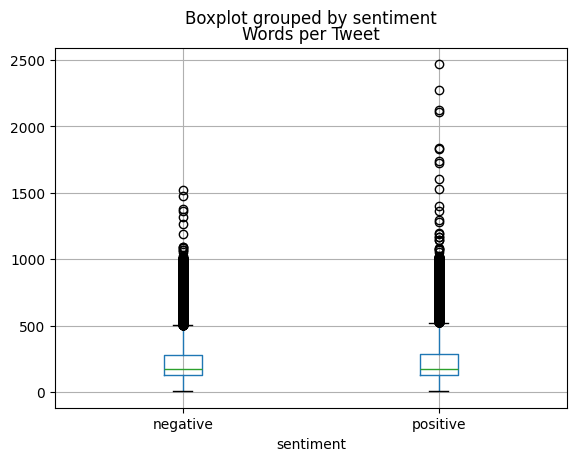

In [ ]:
df['Words per Tweet'] = df['review'].str.split().apply(len)
df.boxplot("Words per Tweet", by="sentiment")

In [ ]:
from transformers import AutoTokenizer
mdl_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(mdl_ckpt)
text = "We love to sleep! Winters are awesome!"
encoded_text = tokenizer(text)
print(encoded_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 2057, 2293, 2000, 3637, 999, 12214, 2024, 12476, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, stratify=df['sentiment'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['sentiment'])
train.shape, test.shape, validation.shape

((35000, 3), (10000, 3), (5000, 3))

In [ ]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})

In [ ]:
dataset
dataset['train'][0]

{'review': '"Fear of a Black Hat" is a superbly crafted film. I was laughing almost continuously from start to finish. If you have the means, I highly recommend viewing this movie It is, by far, the funniest movie I have had the pleasure to experience. Grab your stuff!',
 'sentiment': 'positive',
 'Words per Tweet': 47}

In [ ]:
def tokenize(batch):
    temp= tokenizer(batch['review'], padding=True, truncation=True, return_token_type_ids=True,)
    return temp

In [ ]:
def tokenize(batch):
    temp= tokenizer(batch['review'], padding=True, truncation=True, return_token_type_ids=True,)
    return temp
print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 1000, 3571, 1997, 1037, 2304, 6045, 1000, 2003, 1037, 21688, 2135, 19275, 2143, 1012, 1045, 2001, 5870, 2471, 10843, 2013, 2707, 2000, 3926, 1012, 2065, 2017, 2031, 1996, 2965, 1010, 1045, 3811, 16755, 10523, 2023, 3185, 2009, 2003, 1010, 2011, 2521, 1010, 1996, 4569, 15580, 2102, 3185, 1045, 2031, 2018, 1996, 5165, 2000, 3325, 1012, 6723, 2115, 4933, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
emotion_encoded=dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
# Create label-to-ID and ID-to-label mappings for the second dataset
label2id = {'negative': 0, 'positive': 1}  # Map sentiments to numeric IDs
id2label = {v: k for k, v in label2id.items()}  # Reverse mapping: numeric ID to sentiment

print(label2id)  # Output: {'negative': 0, 'positive': 1}
print(id2label)  # Output: {0: 'negative', 1: 'positive'}

{'negative': 0, 'positive': 1}
{0: 'negative', 1: 'positive'}


In [ ]:
from transformers import AutoModel
import torch
model= AutoModel.from_pretrained(mdl_ckpt)
model
model.config
model_two="bert-base-cased"

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig
Num_labels = len(label2id)
device = torch.device ("cuda" if torch. cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(mdl_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(mdl_ckpt, config=config).to(device)
device
model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
from transformers import TrainingArguments

batch_size=32
training_dir = "bert_base_training_dir"
training_args= TrainingArguments(output_dir = training_dir,
              overwrite_output_dir = True,
              gradient_checkpointing=True,
              num_train_epochs = 2,
              learning_rate = 2e-5,
              fp16=True,
              gradient_accumulation_steps=2,
              per_device_train_batch_size = batch_size,
              per_device_eval_batch_size = batch_size,
              weight_decay = 0.01,
              evaluation_strategy = 'epoch',
              disable_tqdm = False
    )

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics (pred) :
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

<ipython-input-22-f7f22c6f6a80>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [23]:
# Import necessary libraries
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score
import torch

# Define label mappings (if not already defined)
label2id = {'negative': 0, 'positive': 1}
id2label = {v: k for k, v in label2id.items()}

# Load the pre-trained model for sequence classification with the correct number of labels
model_ckpt = "bert-base-uncased"
Num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=Num_labels).to(device)

# Ensure emotion_encoded dataset includes labels
# ... (Your existing code to create emotion_encoded) ...
def tokenize(batch):
    return tokenizer(batch['review'], padding=True, truncation=True, return_token_type_ids=False) # Remove return_token_type_ids
emotion_encoded = dataset.map(tokenize, batched=True, batch_size=None)

# Add 'labels' column to the dataset
def add_labels(example):
    example['labels'] = label2id[example['sentiment']]
    return example

emotion_encoded = emotion_encoded.map(add_labels)

# Define training arguments
batch_size = 32
training_dir = "bert_base_training_dir"
training_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    gradient_checkpointing=True,
    num_train_epochs=2,
    learning_rate=2e-5,
    fp16=True,
    gradient_accumulation_steps=2,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy='epoch',
    disable_tqdm=False
)

# Define compute_metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

# Create and train the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-23-47ab1f0d56a9>:56: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.238000,0.164006,0.940600,0.940600


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.238000,0.164006,0.940600,0.940600
2,0.127400,0.173664,0.944200,0.944200


TrainOutput(global_step=1094, training_loss=0.17705348989427416, metrics={'train_runtime': 2251.5687, 'train_samples_per_second': 31.089, 'train_steps_per_second': 0.486, 'total_flos': 1.84177738752e+16, 'train_loss': 0.17705348989427416, 'epoch': 2.0})

In [24]:
preds_output = trainer.predict(emotion_encoded['test'])
preds_output.metrics
preds_output.predictions

array([[ 2.8203125, -2.3671875],
       [ 3.3886719, -3.25     ],
       [-2.5332031,  2.7539062],
       ...,
       [ 2.9023438, -2.3632812],
       [ 2.8242188, -2.296875 ],
       [ 2.8378906, -2.8359375]], dtype=float32)

In [25]:
import numpy as np
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['labels']

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
label2id

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5000
           1       0.93      0.94      0.94      5000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



{'negative': 0, 'positive': 1}

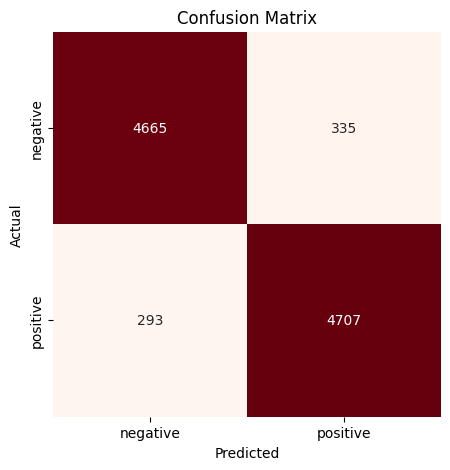

In [27]:
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt ='d', cbar=False, cmap='Reds')
plt.ylabel("Actual")  # Corrected typo: 'yabel' to 'ylabel'
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.show()

In [28]:
text = "I am super happy today. I got it done. Finally!!"
def get_prediction (text) :
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
      outputs = model(**input_encoded)
    logits = outputs. logits
    pred = torch.argmax(logits, dim=1) .item()
    return id2label[pred]
get_prediction (text)

'positive'

In [29]:
trainer.save_model("bert-base-uncased-sentiment-model")

In [30]:
from transformers import pipeline
classifier = pipeline('text-classification', model= 'bert-base-uncased-sentiment-model')
classifier([text, 'A very good day indeed', "We loved mth111", "I am feeling anxious"])

Device set to use cuda:0


[{'label': 'LABEL_1', 'score': 0.990329384803772},
 {'label': 'LABEL_1', 'score': 0.969264805316925},
 {'label': 'LABEL_1', 'score': 0.9106374382972717},
 {'label': 'LABEL_1', 'score': 0.5426698327064514}]

In [31]:
!pip install gradio transformers
import gradio as gr
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load model and tokenizer
model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# Load the model from the saved directory - Provide the path where you saved the model
# The path should be the directory where the model was saved using trainer.save_model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased-sentiment-model")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

label2id = {'negative': 0, 'positive': 1}
id2label = {v: k for k, v in label2id.items()}

# Prediction function with error handling
def predict_sentiment(text):
    try:
        inputs = tokenizer(text, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        predicted_class = torch.argmax(outputs.logits).item()
        sentiment = id2label[predicted_class]
        return sentiment
    except Exception as e:
        return f"Error: {str(e)}"  # Return error message to Gradio

# Create Gradio interface
iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=2, placeholder="Enter movie review here..."),
    outputs="text",
    title="IMDB Sentiment Classifier",
    description="Enter a movie review to get its sentiment (positive or negative)."
)

# Launch the interface
iface.launch(share=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://341f6db7f719121c48.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
